# Assignment

This synthetic dataset contains 4,362 rows and five columns, including both numerical and categorical data. It is designed for data cleaning, imputation, and analysis tasks, featuring structured missing values at varying percentages (63%, 4%, 47%, 31%, and 9%).
### The dataset includes:
    1. Category (Categorical): Product category (A, B, C, D)
    2. Price (Numerical): Randomized product prices
    3. Rating (Numerical): Ratings between 1 to 5
    4. Stock (Categorical): Availability status (In Stock, Out of Stock)
    5. Discount (Numerical): Discount percentage

--> This dataset is ideal for practicing missing data handling.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data = pd.read_csv("synthetic_dataset.csv")
data.head(15)

,Category,Price,Rating,Stock,Discount
0,NaN,5548.0,1.870322,NaN,0.0
1,NaN,3045.0,4.757798,NaN,38.0
2,NaN,4004.0,NaN,In Stock,0.0
3,NaN,4808.0,1.492085,NaN,33.0
4,NaN,1817.0,NaN,Out of Stock,23.0
5,NaN,3522.0,NaN,NaN,NaN
6,C,667.0,3.668341,In Stock,41.0
7,A,7125.0,4.983998,Out of Stock,7.0
8,A,2777.0,2.678384,In Stock,6.0
9,NaN,463.0,4.626187,NaN,3.0


In [3]:
data.shape       # Total rows left before NaN removal = 4362 and column = 5

(4362, 5)

In [4]:
# isna() give ans in T/F about NaN present or not and sum() (T=1,F=0)calculate the total NaN values column wise

print(data.isna().sum())

Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64


In [5]:
missing_data = pd.DataFrame({
    "Missing Value" : data.isna().sum() ,  
    "Percentage" : (data.isna().sum() / len(data)) *100 
})
missing_data

,Missing Value,Percentage
Category,2748,62.998624
Price,174,3.988996
Rating,2050,46.996790
Stock,1352,30.994956
Discount,392,8.986703


In [6]:
missing_data = pd.DataFrame({
    "Missing Value" : data.isna().sum() ,                  
    "Percentage" : round((data.isna().sum() / len(data)) *100 , 2)     # round off upto 2 decimal places
})
missing_data

,Missing Value,Percentage
Category,2748,63.00
Price,174,3.99
Rating,2050,47.00
Stock,1352,30.99
Discount,392,8.99


In [7]:
data_org = data                  # store our old/complete data in data1 to use later
data = data.dropna()          # drop all the rows contain NaN value in any of the one of more than one columns  
data

,Category,Price,Rating,Stock,Discount
6,C,667.0,3.668341,In Stock,41.0
7,A,7125.0,4.983998,Out of Stock,7.0
8,A,2777.0,2.678384,In Stock,6.0
11,A,3772.0,4.890750,In Stock,45.0
15,A,7936.0,3.032832,In Stock,44.0
...,...,...,...,...,...
4313,A,4167.0,2.432036,Out of Stock,22.0
4320,C,7630.0,3.475273,In Stock,0.0
4333,D,2424.0,4.716295,In Stock,49.0
4342,D,9847.0,3.667649,Out of Stock,49.0


In [8]:
data.shape      # Total rows left after NaN removal = 540 and column = 5

(540, 5)

In [9]:
data.describe()     # give a summary of numerical data

,Price,Rating,Discount
count,540.000000,540.000000,540.000000
mean,5175.568519,3.063266,24.992593
std,2875.047561,1.132248,14.371817
min,112.000000,1.000366,0.000000
25%,2696.500000,2.097528,13.000000
50%,5248.000000,3.037198,24.000000
75%,7722.750000,4.016861,39.000000
max,9942.000000,4.992002,49.000000


In [10]:
# NaN value replaced by median of that group ( which is checked after removing all NaN from that column )

data_org["Discount"] = data_org["Discount"].fillna(data["Discount"].median())
data_org["Price"] = data_org["Price"].fillna(data["Price"].median())
data_org["Rating"] = data_org["Rating"].fillna(data["Rating"].median())

In [11]:
data_org["Discount"]
data_org["Discount"].replace(0,data["Discount"].median(),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_9984\106797422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_org["Discount"].replace(0,data["Discount"].median(),inplace=True)


In [12]:
data_org["Price"]

0       5548.0
1       3045.0
2       4004.0
3       4808.0
4       1817.0
         ...  
4357    4436.0
4358    6236.0
4359    3283.0
4360    2999.0
4361    5248.0
Name: Price, Length: 4362, dtype: float64

In [13]:
data_org["Rating"]

0       1.870322
1       4.757798
2       3.037198
3       1.492085
4       3.037198
          ...   
4357    4.728335
4358    3.037198
4359    3.037198
4360    4.425995
4361    2.184471
Name: Rating, Length: 4362, dtype: float64

In [14]:
data["Category"].value_counts()     # frequency of each Option in the column

Category
B    143
D    136
C    131
A    130
Name: count, dtype: int64

In [15]:
data_org["Category"] = data_org["Category"].fillna( "B")
data_org["Category"]

0       B
1       B
2       B
3       B
4       B
       ..
4357    B
4358    B
4359    B
4360    D
4361    B
Name: Category, Length: 4362, dtype: object

In [16]:
data_org.head(15)

,Category,Price,Rating,Stock,Discount
0,B,5548.0,1.870322,NaN,24.0
1,B,3045.0,4.757798,NaN,38.0
2,B,4004.0,3.037198,In Stock,24.0
3,B,4808.0,1.492085,NaN,33.0
4,B,1817.0,3.037198,Out of Stock,23.0
5,B,3522.0,3.037198,NaN,24.0
6,C,667.0,3.668341,In Stock,41.0
7,A,7125.0,4.983998,Out of Stock,7.0
8,A,2777.0,2.678384,In Stock,6.0
9,B,463.0,4.626187,NaN,3.0


In [17]:
data_org.shape

(4362, 5)

In [28]:
data_org.head(10)
data.to_csv("data_org.csv", index=False)


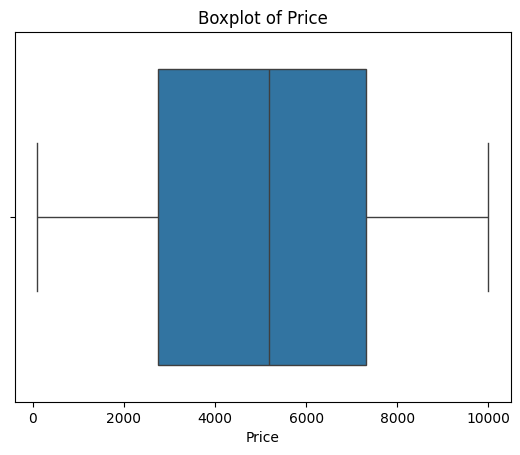

In [19]:
from scipy.stats import norm

sns.boxplot(x = data_org["Price"])
plt.title("Boxplot of Price")
plt.show()

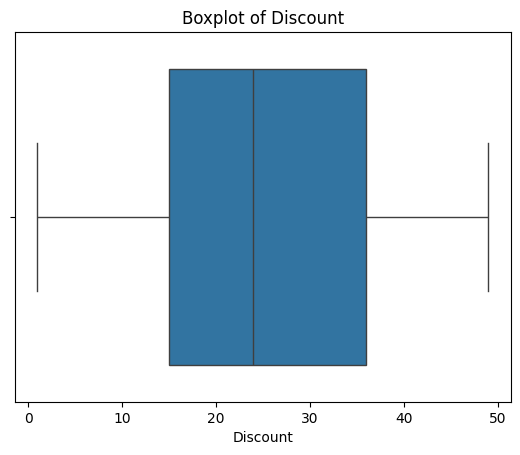

In [20]:
sns.boxplot(x = data_org["Discount"])
plt.title("Boxplot of Discount")
plt.show()

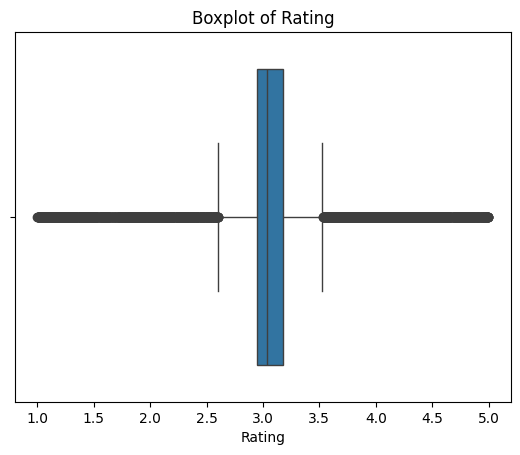

In [21]:
sns.boxplot(x = data_org["Rating"])
plt.title("Boxplot of Rating")
plt.show()

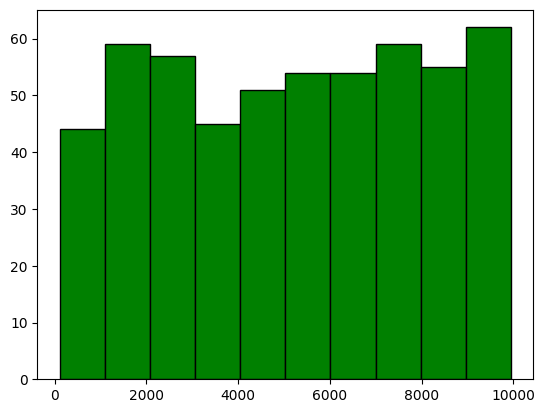

In [22]:
plt.hist(data["Price"],edgecolor="Black",color="green")
plt.show()

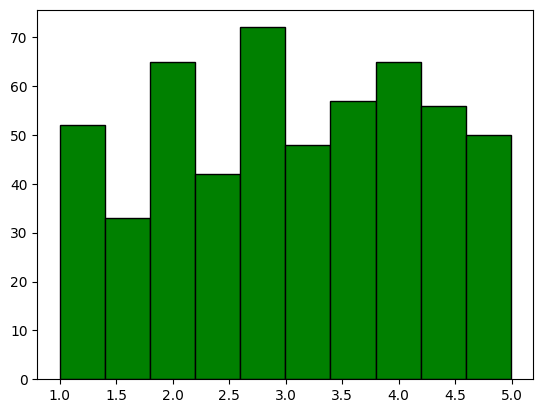

In [23]:
plt.hist(data["Rating"],edgecolor="Black",color="green")
plt.show()

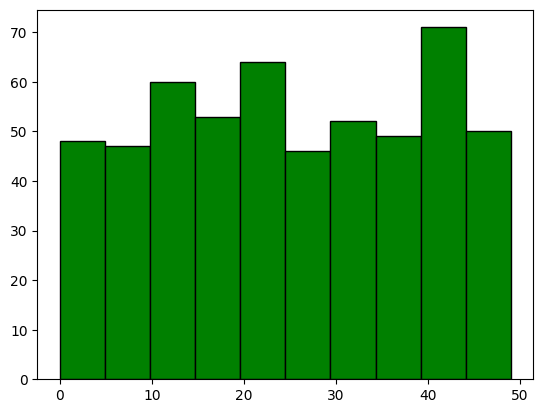

In [24]:
plt.hist(data["Discount"],edgecolor="Black",color="green")
plt.show()

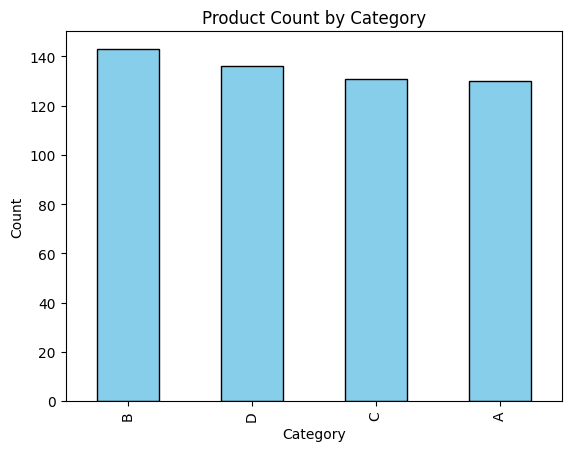

In [25]:
data['Category'].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

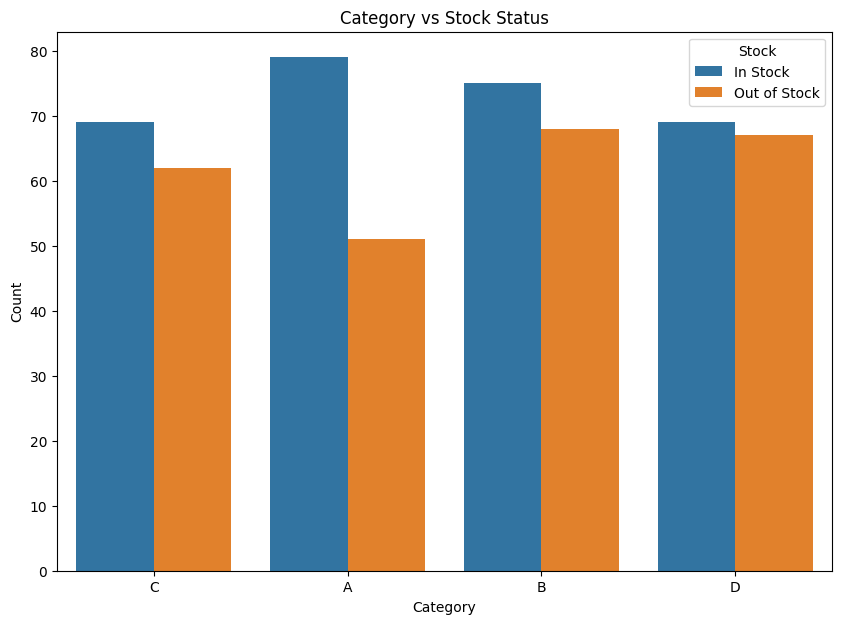

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x="Category", hue="Stock")
plt.title("Category vs Stock Status")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()